**Objective:** Use the california housing data available in sklearn to predict the prices of houses.

In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [14]:
data = fetch_california_housing()
featureDF = pd.DataFrame(data.data, columns=data.feature_names)
featureDF

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### California housing features:
**MedInc**: This column represents the median income for households in a particular district. It is a measure of the income level of the residents in that area. This feature can be used as an indicator of the economic status of the district.

**HouseAge**: This column represents the median age of houses in a district. It provides information about the age of the housing stock in the area, which can be relevant for understanding the condition and quality of housing.

**AveRooms**: This column represents the average number of rooms in houses in the district. It indicates the typical size of houses in the area. This can be a factor in housing prices and occupancy.

**AveBedrms**: This column represents the average number of bedrooms in houses in the district. It provides information about the typical number of bedrooms in the houses, which can be important for understanding household sizes.

**Population**: This column represents the total population in the district. It is a measure of the density of the population in the area, which can impact various aspects of community services and housing demand.

**AveOccup**: This column represents the average household occupancy. It is the ratio of the population to the number of households. This can provide insights into the average household size in the district.

**Latitude**: This column represents the latitude of the district's location. Latitude is a geographical coordinate that specifies the north-south position of a point on the Earth's surface.

**Longitude**: This column represents the longitude of the district's location. Longitude is a geographical coordinate that specifies the east-west position of a point on the Earth's surface.

In [10]:
targetDF = pd.DataFrame(data.target, columns=data.target_names)
targetDF

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [15]:
featureDF.shape

(20640, 8)

In [16]:
featureDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [17]:
featureDF.isnull().any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
dtype: bool

In [18]:
featureDF.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.2, random_state=42, shuffle=True)

In [28]:
train_data = pd.concat([x_train, y_train], axis='columns',
                       names=['MedInc',	'HouseAge',	'AveRooms',	'AveBedrms', 'Population',	'AveOccup',	'Latitude',	'Longitude', 'MedHouseVal'])

In [29]:
train_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.030
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,3.821
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,1.726
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,0.934
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,0.965
...,...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96,2.292
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43,0.978
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38,2.221
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96,2.835


In [30]:
test_data = pd.concat([x_test, y_test], axis='columns',
                       names=['MedInc',	'HouseAge',	'AveRooms',	'AveBedrms', 'Population',	'AveOccup',	'Latitude',	'Longitude', 'MedHouseVal'])

In [31]:
test_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000
...,...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22,2.63300
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83,2.66800
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05,5.00001
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76,0.72300


In [32]:
train_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [33]:
corr_mat = train_data.corr(method='pearson')
corr_mat

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.121711,0.336013,-0.072550,0.004122,0.022061,-0.076571,-0.017040,0.690647
HouseAge,-0.121711,1.000000,-0.160892,-0.087983,-0.292283,0.016245,0.005296,-0.101818,0.103706
AveRooms,0.336013,-0.160892,1.000000,0.836163,-0.073733,-0.004922,0.110695,-0.029339,0.158485
AveBedrms,-0.072550,-0.087983,0.836163,1.000000,-0.071267,-0.006035,0.073161,0.016647,-0.051351
Population,0.004122,-0.292283,-0.073733,-0.071267,1.000000,0.072330,-0.102499,0.094276,-0.026032
AveOccup,0.022061,0.016245,-0.004922,-0.006035,0.072330,1.000000,0.005837,-0.000598,-0.022030
Latitude,-0.076571,0.005296,0.110695,0.073161,-0.102499,0.005837,1.000000,-0.924485,-0.142983
Longitude,-0.017040,-0.101818,-0.029339,0.016647,0.094276,-0.000598,-0.924485,1.000000,-0.046349
MedHouseVal,0.690647,0.103706,0.158485,-0.051351,-0.026032,-0.022030,-0.142983,-0.046349,1.000000


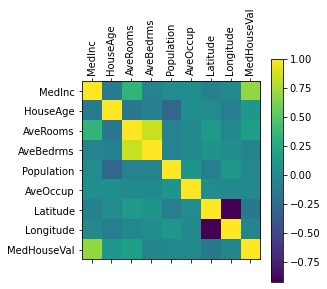

In [34]:
# Visualize the correlation matrix
import matplotlib.pyplot as plt
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

[]

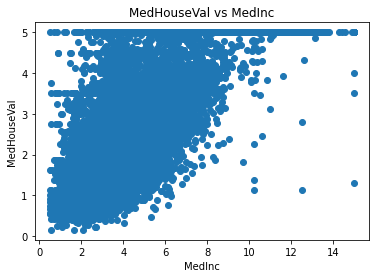

In [35]:
plt.scatter(x_train['MedInc'], y_train)
plt.title("MedHouseVal vs MedInc")
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.plot()

[]

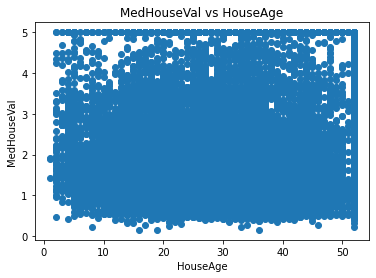

In [36]:
plt.scatter(x_train['HouseAge'], y_train)
plt.title("MedHouseVal vs HouseAge")
plt.xlabel("HouseAge")
plt.ylabel("MedHouseVal")
plt.plot()

[]

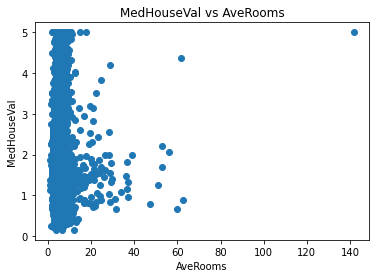

In [37]:
plt.scatter(x_train['AveRooms'], y_train)
plt.title("MedHouseVal vs AveRooms")
plt.xlabel("AveRooms")
plt.ylabel("MedHouseVal")
plt.plot()

[]

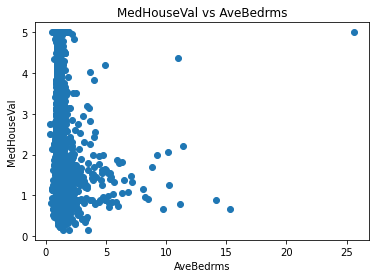

In [38]:
plt.scatter(x_train['AveBedrms'], y_train)
plt.title("MedHouseVal vs AveBedrms")
plt.xlabel("AveBedrms")
plt.ylabel("MedHouseVal")
plt.plot()

[]

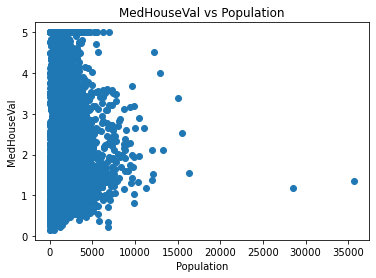

In [39]:
plt.scatter(x_train['Population'], y_train)
plt.title("MedHouseVal vs Population")
plt.xlabel("Population")
plt.ylabel("MedHouseVal")
plt.plot()

[]

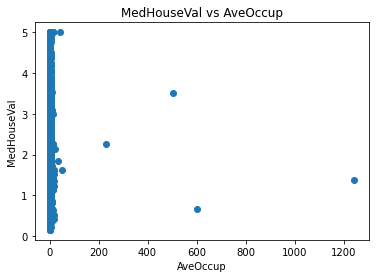

In [40]:
plt.scatter(x_train['AveOccup'], y_train)
plt.title("MedHouseVal vs AveOccup")
plt.xlabel("AveOccup")
plt.ylabel("MedHouseVal")
plt.plot()

[]

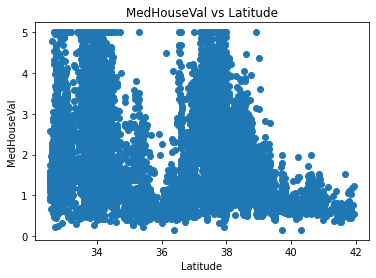

In [41]:
plt.scatter(x_train['Latitude'], y_train)
plt.title("MedHouseVal vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("MedHouseVal")
plt.plot()

[]

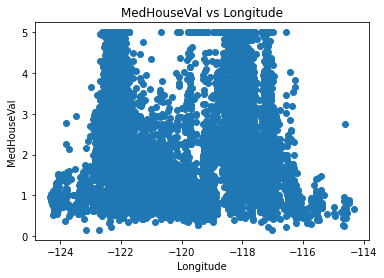

In [44]:
plt.scatter(x_train['Longitude'], y_train)
plt.title("MedHouseVal vs Longitude")
plt.xlabel("Longitude")
plt.ylabel("MedHouseVal")
plt.plot()

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [46]:
y_pred_train

array([[1.93725845],
       [2.48910616],
       [2.64735483],
       ...,
       [2.03879912],
       [2.84075139],
       [2.27373156]])

In [47]:
y_pred_test

array([[0.71912284],
       [1.76401657],
       [2.70965883],
       ...,
       [4.46877017],
       [1.18751119],
       [2.00940251]])

In [52]:
#Evaluate model using commonly used metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print the evaluation metrics on train data
print("Evaluation metrics: Train Data")
print("Mean absolute error: ", mae_train)
print("Mean squared error : ", mse_train)
print("R-squared score    : ", r2_train)

Evaluation metrics: Train Data
Mean absolute error:  0.5286283596581924
Mean squared error :  0.5179331255246699
R-squared score    :  0.6125511913966952


In [54]:
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics on test data
print("Evaluation metrics: Test Data")
print("Mean absolute error: ", mae_test)
print("Mean squared error : ", mse_test)
print("R-squared score    : ", r2_test)

Evaluation metrics: Test Data
Mean absolute error:  0.5332001304956556
Mean squared error :  0.5558915986952442
R-squared score    :  0.575787706032451


In [55]:
print("Model coefficients    : ", model.coef_)
print("Corresponding features: ", featureDF.columns.values)

Model coefficients    :  [[ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
  -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]]
Corresponding features:  ['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude']
